In [ ]:
#Extreme Gradient Boosting : Ensemble Learning Method
#Prevents overfitting
#can run in parallel
#automatically fill in missing values
#powerful and accuracte model
#incremental training (split up training over a period of time)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score,recall_score

In [ ]:
data=load_iris(as_frame=True)
data=pd.DataFrame(data.data)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
iris=load_iris()
numSample, numFeature=iris.data.shape
print(numSample)
print(numFeature)
print(iris.target_names)

150
4
['setosa' 'versicolor' 'virginica']


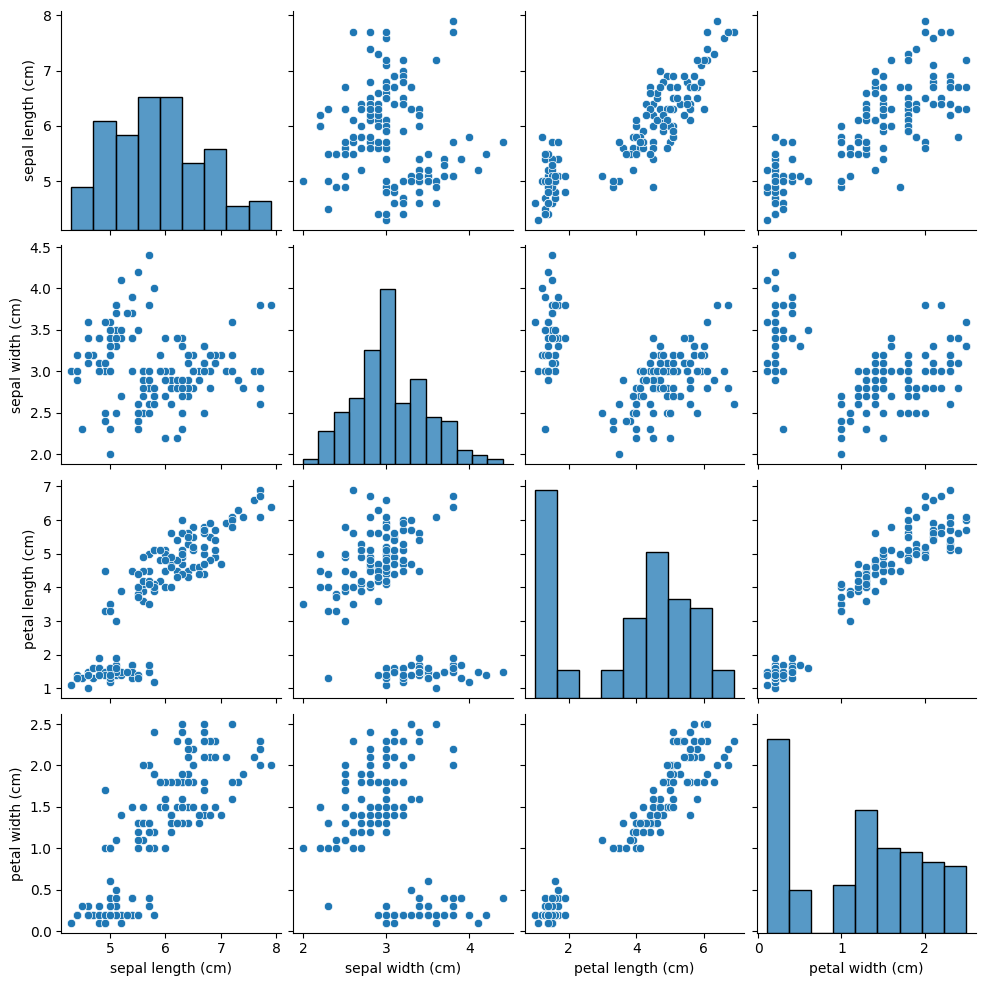

In [ ]:
sns.pairplot(data)

<Axes: >

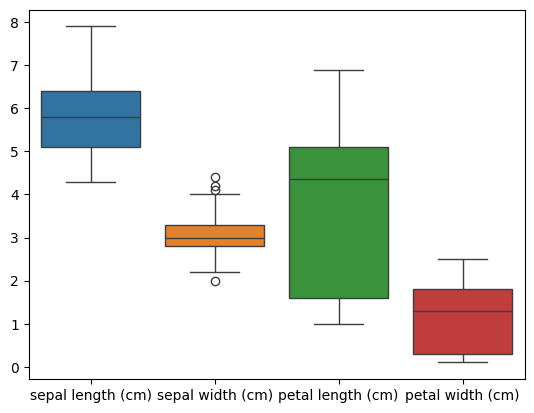

In [ ]:
sns.boxplot(data)

In [ ]:
# Define bins for sepal length
bins = [0, 4.5, 5.0, 5.5, 6.0, 7.0]
labels = ['<4.5', '4.5-5.0', '5.0-5.5', '5.5-6.0', '6.0+']
data['sepal_length_bin'] = pd.cut(data['sepal length (cm)'], bins=bins, labels=labels, right=False)

# Count the number of instances in each bin
sepal_length_counts = data['sepal_length_bin'].value_counts().sort_index()
print(sepal_length_counts)

sepal_length_bin
<4.5        4
4.5-5.0    18
5.0-5.5    30
5.5-6.0    31
6.0+       54
Name: count, dtype: int64


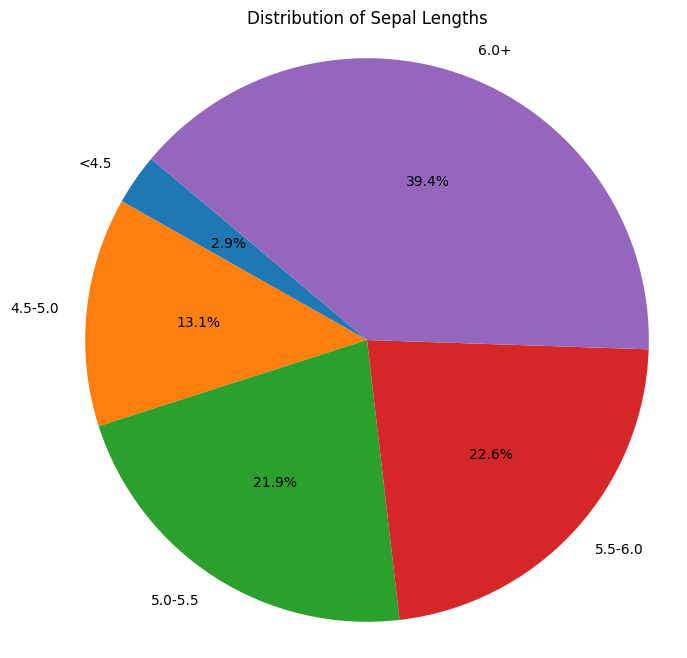

In [ ]:
#autopct='%1.1f%%' formats the percentages to one decimal place.
#startangle= 140 rotates the start of the pie chart for better aesthetics.
#plt.axis('equal') ensures the pie chart is drawn as a circle.
plt.figure(figsize=(8, 8))
plt.pie(sepal_length_counts, labels=sepal_length_counts.index, autopct='%1.1f%%',startangle=140)
plt.title('Distribution of Sepal Lengths')
plt.axis('equal')
plt.show()

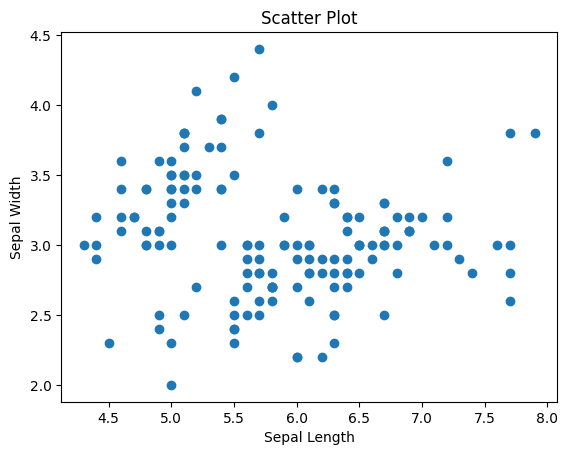

In [ ]:
m=data['sepal length (cm)']
n=data['sepal width (cm)']
plt.scatter(m,n)
plt.title("Scatter Plot")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

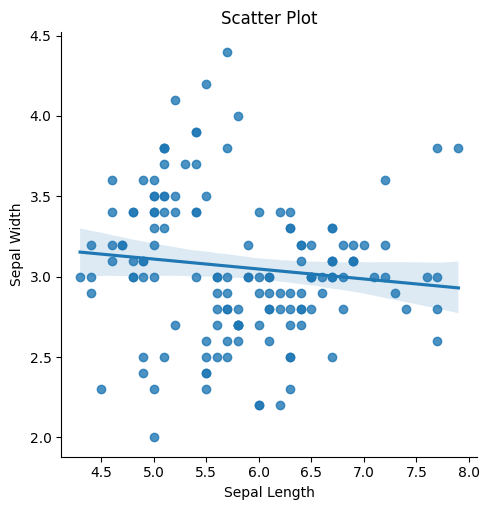

In [ ]:
# Creating a scatter plot with a regression line
sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=data)
plt.title("Scatter Plot")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

<Figure size 1000x600 with 0 Axes>

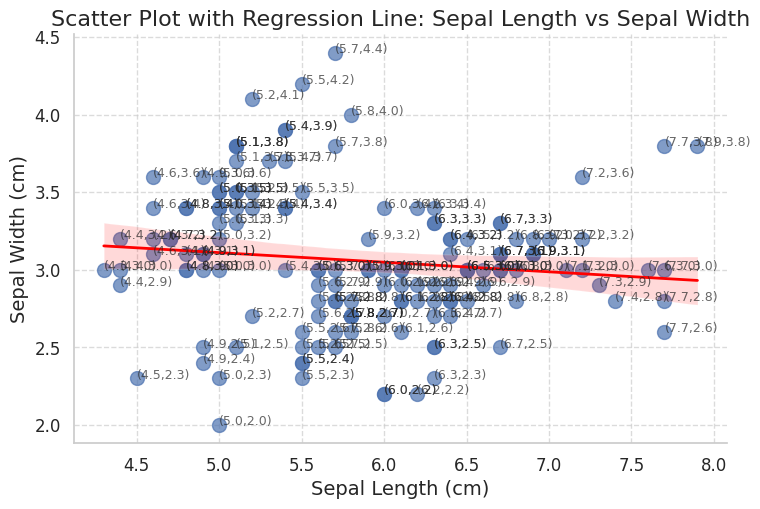

In [ ]:
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visibility
sns.set(style="whitegrid")  # Set the background style

# Scatter plot with regression line
plot = sns.lmplot(x='sepal length (cm)', y='sepal width (cm)', data=data, aspect=1.5, scatter_kws={'s': 100, 'alpha': 0.7}, line_kws={'color': 'red', 'linewidth': 2})

# Adding titles and labels
plt.title("Scatter Plot with Regression Line: Sepal Length vs Sepal Width", fontsize=16)
plt.xlabel("Sepal Length (cm)", fontsize=14)
plt.ylabel("Sepal Width (cm)", fontsize=14)

# Annotate with text (optional)
for i in range(len(data)):
    plt.text(data['sepal length (cm)'][i], data['sepal width (cm)'][i], f"({data['sepal length (cm)'][i]},{data['sepal width (cm)'][i]})", fontsize=9, alpha=0.7)

# Customize the ticks and grid lines
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

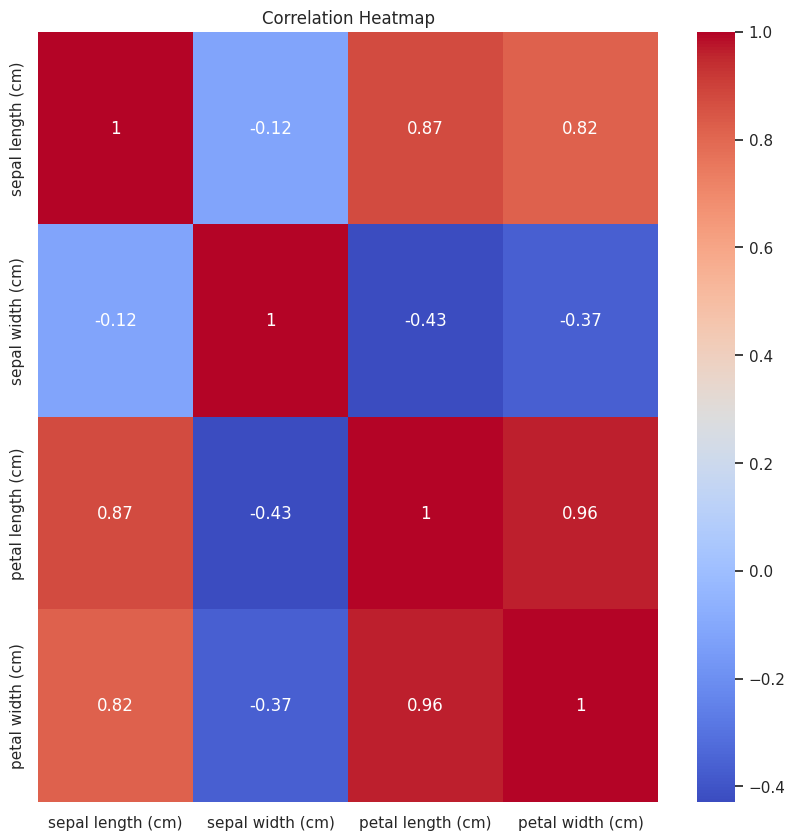

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10,10))
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

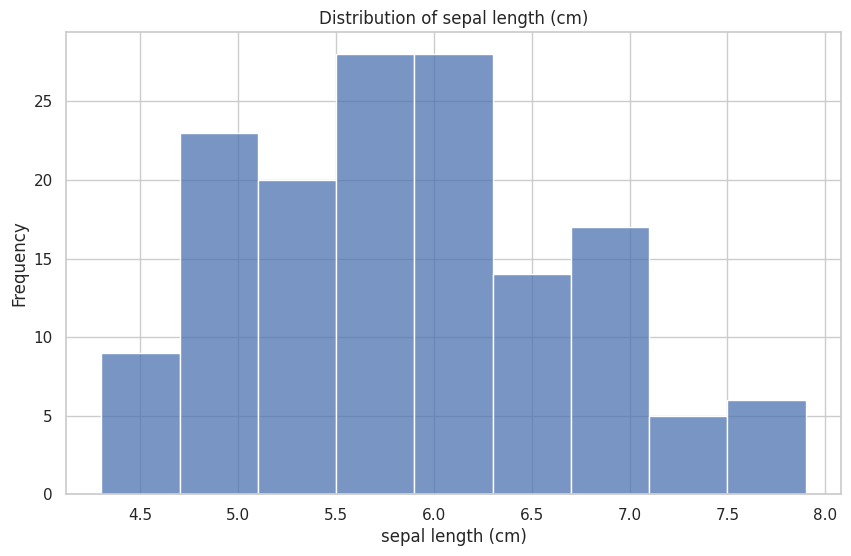

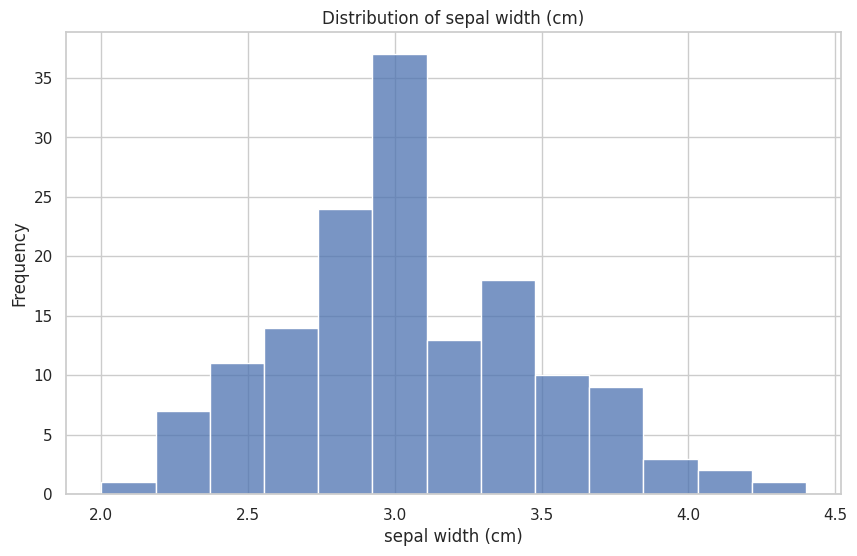

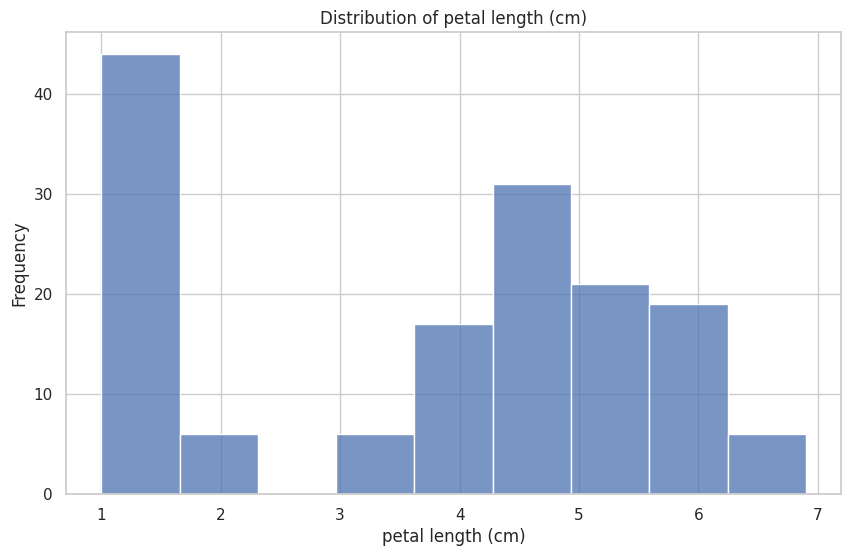

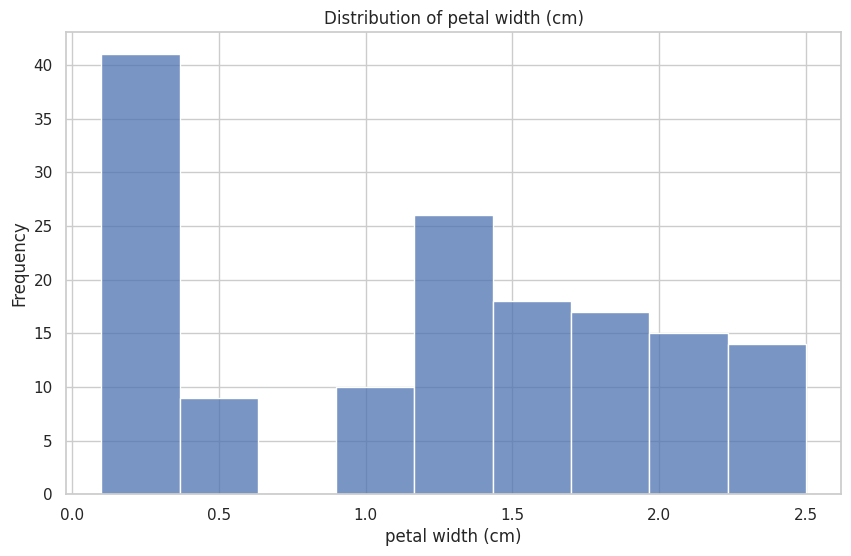

In [ ]:
#Histogram
for col in data.columns:
  if data[col].dtypes != 'object':
    plt.figure(figsize=(10,6))
    sns.histplot(data[col])
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
#TRAIN-TEST SPLIT
x=iris.data
y=iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
#DMatrix: data structure used for efficient handling of datasets, particularly in gradient boosting algorithms like XGBoost.
train= xgb.DMatrix(x_train, label=y_train)
test= xgb.DMatrix(x_test,label=y_test)

In [ ]:
#Defining Hyperparameters
params = {
          'max_depth': 4,
          'eta': 0.3,
          'objective': 'multi:softmax',
          'num_class': 3
          }
epochs= 10
#eta: learning rate
#epoch:the one entire passing of training data through the algorithm
#Multi Softmax: handling multi-class classification problems , gives classification with maximum probability.





In [ ]:
#Traning our model
model = xgb.train(params, train, epochs)

In [ ]:
prediction = model.predict(test)
print(prediction)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [ ]:
#Accuracy Score
accuracy_score(y_test, prediction)

1.0